In [1]:
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
matches = '/Users/xrubiato/DHLab/Draining-Youtube/videos/9Ax-JrJ06fU/out_openMVG/iter_0/out_features/matches.f.txt'

In [25]:
def line_to_tuple(line):
    return (int(line.split(sep=' ', maxsplit=1)[0]),
            int(line.split(sep=' ', maxsplit=1)[1]))

def extract_matches(path):
    """function to read the matches.f.txt file to extract the matches"""

    # Open and read matches file
    f = open(path,mode='r')
    string_file = f.read()
    
    # Convert to list on lines 
    lines = string_file.split(sep='\n')
    
    nbr_lines = len(lines)
    match_list = list() 
    reach_end = False 
    i = 0 
    
    while not reach_end:
        match_list.append(line_to_tuple(lines[i]))
        i = i + 2 + int(lines[i+1])
        if i + 1 == nbr_lines: reach_end = True

    return match_list

### List of points representation

In [82]:
match_list = extract_matches(path=matches)

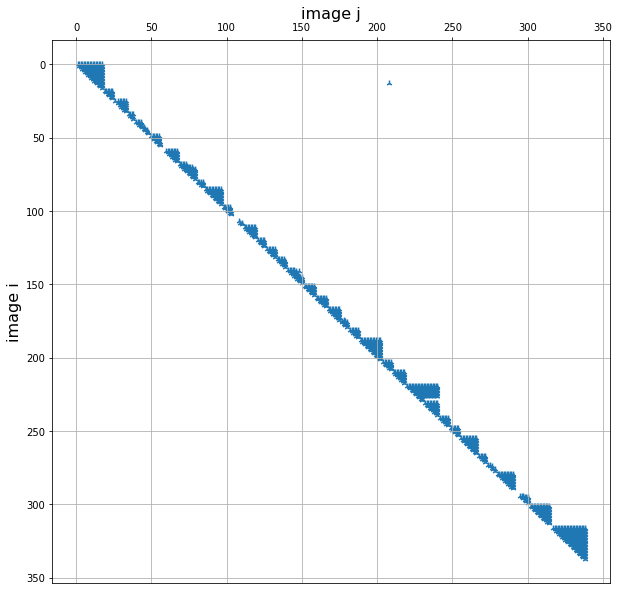

In [112]:
fig = plt.figure(figsize=(10,10))

plt.scatter(match_point[:,1],match_point[:,0],
            marker='2',
            s=35)

plt.xlabel('image j', fontsize=16)
plt.ylabel('image i',fontsize=16)
plt.grid()

ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

### Matrix representation

In [113]:
n = 339

# initialize matrix 
adj_mat = np.zeros((n,n))

idx = np.asarray(match_list)

# slice the matrix with correct idxs
adj_mat[idx[:,0],idx[:,1]] = 1

In [115]:
adj_mat[13,208] = 0 

In [136]:
def split_triangles(adj_mat, n): 
    """Provides the provides a list containing tuples that decribe 
    traingles of images that match : the triangle are composed of the points 
    (i_min, i_min+1), (i_min, i_max), (i_max-1, i_max) in the adjency matrix """
    
    triangles = list()
    i_min = 0 
    i_max = 0 

    for i in range(0,n): 
         
        # Retrieve i_max for current considered line 
        non_zer = np.nonzero(adj_mat[i])[0]

        if non_zer.size > 0:
            if i_max < np.max(non_zer):
                i_max = np.max(non_zer)
        else: 
            if i == i_max: 
                # Close triangle  
                if i_min < i_max:
                    triangles.append((i_min,i_max))
                i_min = i_max + 1
                i_max = i_min 
        #print('i = {}\ni_min = {}\ni_max = {}\n'.format(i,i_min,i_max))

    return triangles

In [140]:
tri

[(0, 17),
 (18, 24),
 (25, 33),
 (34, 38),
 (39, 48),
 (49, 56),
 (59, 67),
 (68, 79),
 (80, 84),
 (85, 96),
 (97, 103),
 (107, 110),
 (111, 119),
 (120, 125),
 (126, 132),
 (133, 139),
 (140, 150),
 (151, 158),
 (159, 166),
 (167, 180),
 (181, 187),
 (188, 202),
 (203, 209),
 (210, 218),
 (219, 240),
 (241, 247),
 (248, 254),
 (255, 266),
 (267, 272),
 (273, 278),
 (279, 290),
 (294, 300),
 (301, 314),
 (316, 338)]

In [141]:
def make_dir(dir_name):
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)

In [155]:
print()

0009


In [160]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [156]:
import os 

In [201]:
def move_triangles(triangles, path_frames, path_vid, path_feats):
    """Functions used to move the frames and their .desc and .feat files
    from main folder to sub-fub folders created """
    s = 0 
    for t in triangles:
        
        path_new_folder = os.path.join(path_vid, 'set_{}'.format(s))
        make_dir(path_new_folder)
        
        
        path_frames_n = os.path.join(path_new_folder, 'frames') 
        make_dir(path_frames_n)
        
        path_feats_n = os.path.join(path_new_folder, 'out_features')
        make_dir(path_feats_n)
        
        
        for i in range(t[0],t[1]+1):
            
            frame = 'frame{:0>4.0f}'.format(i+1)
            frame_png = '{}.png'.format(frame)
            frame_desc = '{}.desc'.format(frame)
            frame_feat = '{}.feat'.format(frame)
            
            # move frames
            try:
                os.rename(os.path.join(path_frames, frame_png),
                          os.path.join(path_frames_n, frame_png))
            except FileNotFoundError:
                pass
            # move .desc and .feat 
            try:
                os.rename(os.path.join(path_feats, frame_desc),
                          os.path.join(path_feats_n, frame_desc))
            except FileNotFoundError:
                pass
            try:
                os.rename(os.path.join(path_feats, frame_feat),
                          os.path.join(path_feats_n, frame_feat))
            except FileNotFoundError:
                pass
        s += 1

In [202]:

try:
    move_triangles(triangles=tri, 
                   path_frames='/Users/xrubiato/DHLab/Draining-Youtube/videos/9Ax-JrJ06fU/frames',
                   path_vid='/Users/xrubiato/DHLab/Draining-Youtube/videos/9Ax-JrJ06fU',
                   path_feats='/Users/xrubiato/DHLab/Draining-Youtube/videos/9Ax-JrJ06fU/iter_0/out_features')
except FileNotFoundError:
    pass
    